# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

"The dataset collected is related to 17 campaigns that occurred between may 2008 and november 2010, corresponding to a total of 79354 contacts. during these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered"

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [451]:
#import relavent tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression, RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn import set_config
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
set_config(display="diagram")
warnings.filterwarnings('ignore')

In [453]:
bank_full = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [455]:
bank_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



**Immediately known that the output variable will need to be encoded to a 1 or 0 for 'yes' or 'no'**

In [459]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are no missing values. But we will need to look at each categorical value to determine how many 'unknowns' there are which has direct implications for the usefulness of those 

In [462]:
bank_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The only feature I am concerned with here is 'pdays' which fills in '999' for the value if the customer was not contacted in a previous campaign. This could throw off the results and would be more useful as a 'yes' or 'no' which we get from the 'previous' feature (0 for no, anything else is yes, can keep as a numeric feature). 

In [465]:
bank_full['previously_contacted'] = bank_full['pdays'].apply(lambda x: 'yes' if x != 999 else 'no')

In [467]:
categorical_features = bank_full.select_dtypes(include=['object']).columns.tolist()
numeric_features = bank_full.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(categorical_features)
print(numeric_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y', 'previously_contacted']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [469]:
#look at value counts for each categorical feature to determine if there's many unknowns
for feature in categorical_features:
    print(bank_full[feature].value_counts())

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64
contact
cellular     26144
telephone    15044
Name: count, dtype: in

Unknown is relatively uncommon except in the cateogry 'default'. Of 41k data points, 'unknown' is <2000 in all features except 'default' where it makes up 8500. 'Default' is also very unbalanced with only 3 'yes' and the rest 'no'. Because of how unbalanced this feature is, we should exclude it from the dataset because it will both eliminate the 'unknown' issue with the feature and likely won't be that useful since it's so unbalanced with only 3 yes. We can also replace 'illiterate' because it is a very low count of customers and likely not helpful in the analysis. 

In [472]:
#drop default, pdays columns, and remove them (plus our target value) from the feature categorization
bank_full_drop = bank_full.drop(columns = ['default', 'pdays'])
categorical_features.remove('default')
categorical_features.remove('y')
numeric_features.remove('pdays')

In [474]:
#drop NAs from dataset
bank_clean = bank_full_drop.replace(['unknown', 'illiterate'], np.nan)
bank_clean = bank_clean.dropna()
bank_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38227 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   38227 non-null  int64  
 1   job                   38227 non-null  object 
 2   marital               38227 non-null  object 
 3   education             38227 non-null  object 
 4   housing               38227 non-null  object 
 5   loan                  38227 non-null  object 
 6   contact               38227 non-null  object 
 7   month                 38227 non-null  object 
 8   day_of_week           38227 non-null  object 
 9   duration              38227 non-null  int64  
 10  campaign              38227 non-null  int64  
 11  previous              38227 non-null  int64  
 12  poutcome              38227 non-null  object 
 13  emp.var.rate          38227 non-null  float64
 14  cons.price.idx        38227 non-null  float64
 15  cons.conf.idx         38

In [476]:
# confirm we haven't broken anything
# for feature in categorical_features:
  # print(bank_clean[feature].value_counts())

Everything looks like it just removed some unknowns in each of the categorical features. Still have 38k data points.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Objective** </br>
The business objective is to create a predictive model to understand the success of a potential customer contact if that customer will accept the offer for a bank deposit interest rate based on various factors (timing, frequency of contact, current status of customer, etc.). This will help the bank better tailor offers to customers that they think are more likely to accept the offer. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [482]:
bank_encoded = bank_clean

In [484]:
#labelencode our outcome feature
bank_encoded['y'] = LabelEncoder().fit_transform(bank_encoded['y'])

In [486]:
#Scale the numeric values
scaler = StandardScaler()
bank_encoded[numeric_features] = scaler.fit_transform(bank_encoded[numeric_features])

In [488]:
#OneHotEncode all the categorical features
bank_encoded = pd.get_dummies(bank_encoded, columns = categorical_features, drop_first=True)

In [490]:
bank_encoded

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,previously_contacted_yes
0,1.569208,0.010783,-0.566065,-0.348988,0.649507,0.734960,0.895855,0.713012,0.328431,0,...,False,False,False,True,False,False,False,True,False,False
1,1.666414,-0.420365,-0.566065,-0.348988,0.649507,0.734960,0.895855,0.713012,0.328431,0,...,False,False,False,True,False,False,False,True,False,False
2,-0.277697,-0.123951,-0.566065,-0.348988,0.649507,0.734960,0.895855,0.713012,0.328431,0,...,False,False,False,True,False,False,False,True,False,False
3,0.013920,-0.412666,-0.566065,-0.348988,0.649507,0.734960,0.895855,0.713012,0.328431,0,...,False,False,False,True,False,False,False,True,False,False
4,1.569208,0.187862,-0.566065,-0.348988,0.649507,0.734960,0.895855,0.713012,0.328431,0,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.221703,0.291799,-0.566065,-0.348988,-0.755470,2.076244,-2.219078,-1.500031,-2.840295,1,...,True,False,False,False,False,False,False,True,False,False
41184,0.597153,0.480427,-0.566065,-0.348988,-0.755470,2.076244,-2.219078,-1.500031,-2.840295,0,...,True,False,False,False,False,False,False,True,False,False
41185,1.569208,-0.266383,-0.204777,-0.348988,-0.755470,2.076244,-2.219078,-1.500031,-2.840295,0,...,True,False,False,False,False,False,False,True,False,False
41186,0.402742,0.707549,-0.566065,-0.348988,-0.755470,2.076244,-2.219078,-1.500031,-2.840295,1,...,True,False,False,False,False,False,False,True,False,False


In [492]:
# check if standard scaler worked (mean 0 and std.dev 1 for all numeric values)
# bank_encoded.describe()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [495]:
#split out data and target feature
X = bank_encoded.drop('y', axis = 1)
y = bank_encoded['y']

In [497]:
#test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

We now have our training and test datasets for both the input variables and the outputs

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Based on the data description (Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.), we will use the 'duration' as the baseline for predictive performance. 

(-6.087792963890646, 40.0)

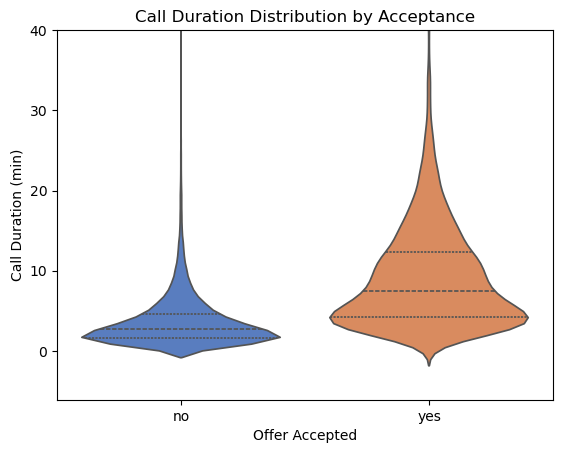

In [502]:
sns.violinplot(x = bank_full['y'], y = bank_full['duration']/60, scale = 'count', inner = 'quartile', palette = 'muted')
plt.title('Call Duration Distribution by Acceptance')
plt.xlabel('Offer Accepted')
plt.ylabel('Call Duration (min)')
plt.ylim(top=40)

As the data description stated, there is a relationship between call duration and acceptance (with longer calls tending to lead to more acceptance). Because this is a binary yes or no question, we will use logistic regression for our baseline model. 

In [505]:
#build logistic regression using standardized and encoded data
baseline_model = LogisticRegression()
baseline_model.fit(X_train[['duration']], y_train)

LogisticRegression()

In [507]:
#understand the performance of that model using accuracy
train_score = baseline_model.score(X_train[['duration']],y_train)
test_score = baseline_model.score(X_test[['duration']],y_test)
print(f'Baseline training accuracy {train_score*100: .2f}%')
print(f'Baseline testing accuracy {test_score*100: .2f}%')

Baseline training accuracy  89.39%
Baseline testing accuracy  89.59%


We now have a baseline score for our baseline model that we can use to compare all our other models against. Using accuracy makes sense for logistic regression and because there isn't much at stake for understanding false negatives and false positive rates (low cost because it's just a call to a consumer). Therefore I will just focus on accuracy as the evaluation metric for all models, for now.

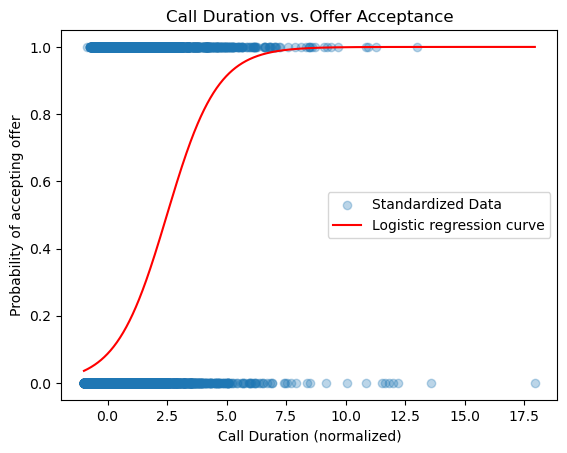

In [510]:
#plot the logistic model against data
X_range = np.linspace(X_train['duration'].min(), X_train['duration'].max(), 1000).reshape(-1,1)
y_pred_prob = baseline_model.predict_proba(X_range)[:,1]
plt.scatter(X_train['duration'], y_train, alpha = 0.3, label = 'Standardized Data')
plt.plot(X_range, y_pred_prob, color = 'red', label = 'Logistic regression curve')
plt.xlabel('Call Duration (normalized)')
plt.ylabel('Probability of accepting offer')
plt.title('Call Duration vs. Offer Acceptance')
plt.legend()

As we can see in the chart, calls lasting longer than about 2.5 times standard deviation (calls longer than ~15 minutes) will be automatically coded as 'accepted' in this model. However, the predictive power of this kind of model is not very useful as seen in the description above.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [554]:
#first remove duration from the model data
X_train_nd = X_train.drop('duration', axis = 1)
X_test_nd = X_test.drop('duration', axis = 1)

In [576]:
logistic = LogisticRegression()
start_time_log = time.time()
logistic.fit(X_train, y_train)
log_time = (time.time() - start_time_log)

### Problem 9: Score the Model

What is the accuracy of your model?

In [560]:
basic_log_train_score = logistic.score(X_train, y_train)
basic_log_test_score = logistic.score(X_test, y_test)
print(f'Simple logistic regression training accuracy {basic_log_train_score*100: .2f}%')
print(f'Simple logistic regression testing accuracy {basic_log_test_score*100: .2f}%')

Simple logistic regression training accuracy  91.23%
Simple logistic regression testing accuracy  91.15%


Accuracy score is already higher after a basic logistic regression on all variables (except duration) which is 2% higher than the basic regression on duration so this is a great start.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [564]:
#define a results DataFrame
results = []

In [566]:
#run basic KNN model
knn_basic = KNeighborsClassifier()
start_time_knn = time.time()
knn_basic.fit(X_train, y_train)
knn_time = (time.time() - start_time_knn)
knn_train_score = knn_basic.score(X_train, y_train)
knn_test_score = knn_basic.score(X_test, y_test)

In [567]:
#run basic decision tree
dt_basic = DecisionTreeClassifier()
start_time_dt = time.time()
dt_basic.fit(X_train, y_train)
dt_time = (time.time() - start_time_dt)
dt_train_score = dt_basic.score(X_train, y_train)
dt_test_score = dt_basic.score(X_test, y_test)

In [570]:
#run basic svm
svm_basic = SVC()
start_time_svm = time.time()
svm_basic.fit(X_train, y_train)
svm_time = (time.time() - start_time_svm)
svm_train_score = svm_basic.score(X_train, y_train)
svm_test_score = svm_basic.score(X_test, y_test)

In [578]:
#compile results into data frame
basic_results = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Train Time': [log_time, knn_time, dt_time, svm_time],
    'Train Accuracy': [basic_log_train_score, knn_train_score, dt_train_score, svm_train_score],
    'Test Accuracy': [basic_log_test_score, knn_test_score, dt_test_score, svm_test_score]
}

basic_results_df = pd.DataFrame(basic_results)
basic_results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.476091,0.912298,0.911457
1,KNN,0.105483,0.930480,0.902433
2,Decision Tree,0.378488,1.000000,0.885561
3,SVM,31.551612,0.923057,0.913419


Each of the basic models have done a fairly descent job of predicting the test results, with only decision trees scoring lower on accuracy than the baseline model. KNN (surprisingly, since it runs on every data point and averages 5 neighbors by default) uses the least computational power while SVM uses an order of magnitude or two more than the othe models while also scoring the highest on accuracy (marginally better than logisitic regression). <br>
<br>
We can also see there is improvement to be made. SVM can be made more computationally efficient by maxing out maximum iterations and using different hyperparmater 'C' and teting different model types ('rbf' is default). Decision trees has overfitted to the training data by scoring a perfect 1.00 accuracy but showing the lowest accuracy on the test dataset, so we can limit the depth to reduce overfitting as the default model has no max_depth and will continue branching until all nodes are pure or smaller than 3 samples. KNN and Logisitic Regression are close between test and train prediction accuracy but we can still likely improve the results by tuning hyperparameters. 

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [605]:
#should we remove any features that aren't useful?
for feature in categorical_features:
    print(f"Fractions for feature: {feature}")
    fractions = bank_clean.groupby([feature, 'y']).size() / bank_clean.groupby(feature).size()
    print(fractions.reset_index(name='fraction'))
    print()

Fractions for feature: job
              job  y  fraction
0          admin.  0  0.870874
1          admin.  1  0.129126
2     blue-collar  0  0.930426
3     blue-collar  1  0.069574
4    entrepreneur  0  0.915317
5    entrepreneur  1  0.084683
6       housemaid  0  0.900609
7       housemaid  1  0.099391
8      management  0  0.888563
9      management  1  0.111437
10        retired  0  0.753494
11        retired  1  0.246506
12  self-employed  0  0.892273
13  self-employed  1  0.107727
14       services  0  0.920075
15       services  1  0.079925
16        student  0  0.697674
17        student  1  0.302326
18     technician  0  0.892947
19     technician  1  0.107053
20     unemployed  0  0.856698
21     unemployed  1  0.143302

Fractions for feature: marital
    marital  y  fraction
0  divorced  0  0.896047
1  divorced  1  0.103953
2   married  0  0.899085
3   married  1  0.100915
4    single  0  0.863463
5    single  1  0.136537

Fractions for feature: education
              educa

Based on the success rate for each categorical value, it's clear that almost every categorical feature is useful expect potentially whether or not the customer has a housing loan. In this feature, the fraction that accept the offer is about the same whether or not the customer has an outstanding housing loan. Eliminating one feature won't improve computation time or interpretibility that significantly so it's not worth eliminating in case this simple analysis has missed other interactions.

In [614]:
# Define the models and hyperparameters
models = {
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [1, 3, 5, 7]}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [3, 4, 5, 7, 10, 15]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']})
}

In [616]:
#create results dataframe to store best model times
best_model_results = []
best_model_params = []

for name, (model, params) in models.items():
    #create pipeline
    pipeline = Pipeline([
        (name, model)
    ])

    #perform gridsearch on each model with parameters
    grid_search = GridSearchCV(pipeline, param_grid = params, cv = 5, n_jobs = -1)

    #fit each model and record time
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

    #understand best model
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    #determine accuracy
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    #append
    best_model_results.append([name, fit_time, train_score, test_score])
    best_model_params.append([name, best_params])

In [645]:
#create the results DataFrame
grid_search_results_df = pd.DataFrame(
    best_model_results, columns = ['Model', 'Avg. Train Time', 'Train Accuracy', 'Test Accuracy'])
grid_search_results_df.set_index('Model', inplace=True)
grid_search_results_df

,Avg. Train Time,Train Accuracy,Test Accuracy
Model,,,
logisticregression,2.180325,0.912298,0.911195
knn,3.684586,0.924823,0.903087
decisiontreeclassifier,0.302984,0.916026,0.911849
svc,83.108065,0.923057,0.913419


Here we see we can get to about the same test accuracy across all models by tuning the hyperparameters, but we're not much better than our baseline models. In fact, SVM even has the exact same testing accuracy between the baseline and tuned models. Only Decision Tree sees a substantial increase in accuracy which makes sense, we're no longer over fitting the training dataset by going to a maximum depth when each branch only has purity or less than 3 datapoints. 

Because accuracy is more or less the same across models, it might now make sense to compare precision and recall between models to see if there is anythign substantial to notice there.

In [636]:
#create best parameters dataframe to further change models
grid_search_params_df = pd.DataFrame(best_model_params, columns = ['Model', 'Best Parameters'])
grid_search_params_df.set_index('Model', inplace = True)
grid_search_params_df

,Best Parameters
Model,
logisticregression,{'logisticregression__C': 10}
knn,{'knn__n_neighbors': 7}
decisiontreeclassifier,{'decisiontreeclassifier__max_depth': 4}
svc,"{'svc__C': 1, 'svc__kernel': 'rbf'}"


We can now run each best version of the model while looking at other performance metrics to determine the best model for the prediction task

In [638]:
final_models = {
    'logisticregression': LogisticRegression(max_iter=1000, C = 10),
    'knn': KNeighborsClassifier(n_neighbors=7),
    'decisiontreeclassifier': DecisionTreeClassifier(max_depth=4),
    'svc': SVC(kernel = 'rbf', probability=True)
}

In [649]:
#run models with precision and recall measurements
#create results dataframe to store best model times
final_model_results = []

for name, model in final_models.items():
    #fit each model and record time
    start_time = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start_time

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #determine accuracy, recall, and precision
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    #append
    final_model_results.append([name, fit_time, train_score, test_score, train_recall, test_recall, train_precision, test_precision])

In [653]:
final_model_results_df = pd.DataFrame(
    final_model_results,
    columns = ['Model', 'Fit Time', 'Train Score', 'Test Score', 'Train Recall', 'Test Recall', 'Train Precision', 'Test Precision']
)
final_model_results_df.set_index('Model', inplace = True)
final_model_results_df

,Fit Time,Train Score,Test Score,Train Recall,Test Recall,Train Precision,Test Precision
Model,,,,,,,
logisticregression,0.298121,0.912298,0.911195,0.428280,0.406553,0.670776,0.638095
knn,0.015626,0.924823,0.903087,0.522741,0.375000,0.730346,0.577570
decisiontreeclassifier,0.062529,0.916026,0.911849,0.568222,0.540049,0.641963,0.601351
svc,191.972702,0.923057,0.913419,0.464723,0.391990,0.755092,0.667355


### Recommendations
I recommend running the Decision Tree model with max depth of 4 across all variables except 'default', 'duration', and 'pdays' (which should be converted to whether or not the customer converted on a previous campaign which is a very useful prediction metric). Decision Tree is among the most accurate while also limiting false negatives which is more important to marketing campaigns than false positives (it's much less expensive to make an unnecessary call to a customer who's actually unlikely to accept the offer than it is to not call a likely customer that looks unlikely) and therefore we want to maximize recall. Decision Tree has the highest recall at 54%

### Questions and Next Steps
Because I eliminated data points that were considered 'unknown' it is worth making sure, to the extent possible, that all data fields are accurately filled in. So the questions are:
- Are the fields that are possible 'unknown' that important to the model? If no, they can be ignored or excluded from the model and fields that are 'unknown' won't matter much to the prediction probability.
- Can we approximate 'unknown' values (imputation) based on other known responses to improve model predictivity?
- Can we better streamline the model to increase efficiency and continue to improve over time?

Next steps:
- Test model over the next quarter to tailor marketing campaign to the most probable acceptances, at the right time (e.g., certain customer profiles at certain times like at the end of the quarter or certain days of the week). Evaluate based on acceptance rate by demographic, overall acceptance rate, and acceptances per call
- Iterate and refine model with more data as the marketing strategy changes and update on a quarter by quarter basis. 